**1.Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

**2.Mount the Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**3.Import the Dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/OIBSIP Data Analytics/ifood_df.csv')

In [4]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


**4.Describing the Data**

In [5]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [6]:
df.shape

(2205, 39)

In [7]:
df.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Income,1.000000,-0.531699,0.042483,0.006716,0.730495,0.537920,0.702500,0.551758,0.555601,0.417653,...,-0.001960,0.044336,-0.060621,-0.239604,0.017644,0.021633,0.091176,0.823066,0.816879,0.388247
Kidhome,-0.531699,1.000000,-0.040207,0.011829,-0.499288,-0.374388,-0.445665,-0.389895,-0.379101,-0.356550,...,0.007422,-0.072244,0.019050,0.055308,-0.001930,0.011482,-0.042031,-0.551152,-0.539828,-0.212080
Teenhome,0.042483,-0.040207,1.000000,0.013881,0.002783,-0.176925,-0.267177,-0.206371,-0.164246,-0.019619,...,0.027181,0.047962,-0.056259,-0.120519,-0.024698,0.023806,0.092901,-0.142995,-0.146866,-0.130255
Recency,0.006716,0.011829,0.013881,1.000000,0.016470,-0.004909,0.026138,0.001177,0.025535,0.018558,...,0.023908,-0.001348,-0.006789,-0.003093,0.031419,-0.025563,-0.009234,0.021132,0.020241,-0.013344
MntWines,0.730495,-0.499288,0.002783,0.016470,1.000000,0.384947,0.593119,0.395967,0.388613,0.390194,...,0.005915,0.034139,-0.096259,-0.140369,-0.060920,0.036403,0.160804,0.902310,0.901848,0.509913
MntFruits,0.537920,-0.374388,-0.176925,-0.004909,0.384947,1.000000,0.568100,0.592556,0.570986,0.392596,...,-0.014210,0.025961,0.025452,-0.060915,0.114919,-0.055581,-0.084301,0.606658,0.594180,0.155133
MntMeatProducts,0.702500,-0.445665,-0.267177,0.026138,0.593119,0.568100,1.000000,0.595673,0.556511,0.375581,...,-0.004064,0.017370,-0.041738,-0.111968,0.064917,-0.004020,-0.004194,0.861392,0.860663,0.319553
MntFishProducts,0.551758,-0.389895,-0.206371,0.001177,0.395967,0.592556,0.595673,1.000000,0.582974,0.425420,...,0.015502,0.041886,0.061304,-0.059840,0.106227,-0.050153,-0.103952,0.635038,0.620626,0.174675
MntSweetProducts,0.555601,-0.379101,-0.164246,0.025535,0.388613,0.570986,0.556511,0.582974,1.000000,0.355747,...,-0.011220,0.049347,0.060550,-0.057863,0.104075,-0.067723,-0.085702,0.604514,0.595394,0.200174
MntGoldProds,0.417653,-0.356550,-0.019619,0.018558,0.390194,0.392596,0.375581,0.425420,0.355747,1.000000,...,-0.010375,0.043096,0.019189,-0.065014,0.131759,-0.032492,-0.119708,0.463694,0.388776,0.194647


Reviewing data columns and comparing them to the dataset description¶
Retrieving the list of actual columns to compare with the column's description in the dictionary.png. The list of columns has been updated and the data description contains actual columns.

In [8]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

**5.Checking the Data that is there any missing values is present or not**

In [9]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


**As you can see there is no missing values in the data it's good to go!**

#Checking column types
**All column types look good. There is no need to change any data types.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

#6.Assessing unique values
**Let's check the unique values in each column. If a column has the same values then we cannot use this column in our analysis and can remove it from the data frame.**

In [11]:
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


**Dropping the ZCost and ZRevenue columns because both the columns are having the same values**

In [12]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

**7.Let's visualize the data with Box plots, Histogram, Pie Charts, Scatter Plots, Correlation Matrix and Binary Values Correlations**

**Box Plot**

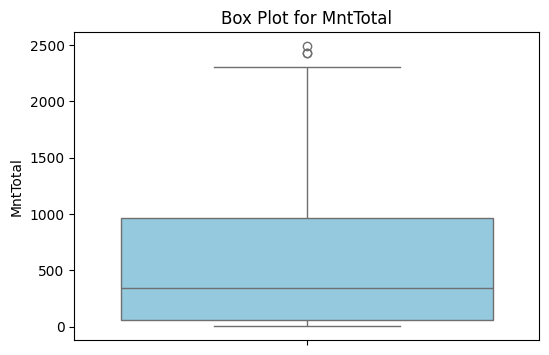

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='MntTotal', color='skyblue')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

**A box plot (also called a box-and-whisker plot) is a graphical representation of the distribution of a dataset. It summarizes key statistics, making it useful for identifying outliers, spread, and skewness**.

**Key Components of a Box Plot:**

Median (Q2) – The middle value of the dataset.

First Quartile (Q1, 25th percentile) – The median of the lower half of the data.

Third Quartile (Q3, 75th percentile) – The median of the upper half of the data.

Interquartile Range (IQR) – The range between Q1 and Q3 (Q3 - Q1).

Whiskers – Extend to the smallest and largest values within 1.5 * IQR.

Outliers – Points outside the whiskers, shown as individual dots.

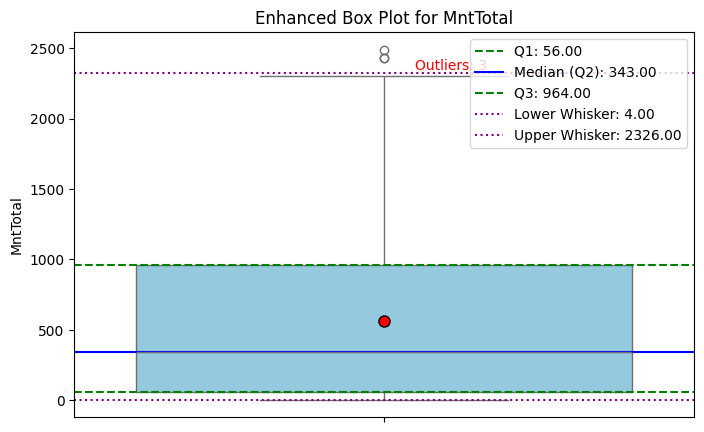

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute key box plot statistics
Q1 = df['MntTotal'].quantile(0.25)  # First quartile (25th percentile)
Q2 = df['MntTotal'].median()        # Median (50th percentile)
Q3 = df['MntTotal'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                       # Interquartile range
lower_whisker = max(df['MntTotal'].min(), Q1 - 1.5 * IQR)  # Lower whisker
upper_whisker = min(df['MntTotal'].max(), Q3 + 1.5 * IQR)  # Upper whisker
outliers = df[(df['MntTotal'] < lower_whisker) | (df['MntTotal'] > upper_whisker)]['MntTotal']

# Create figure
plt.figure(figsize=(8, 5))

# Box plot
sns.boxplot(data=df, y='MntTotal', color='skyblue', showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red",
                       "markeredgecolor":"black", "markersize":"8"})

# Add text annotations for key statistics
plt.axhline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axhline(Q2, color='blue', linestyle='-', label=f'Median (Q2): {Q2:.2f}')
plt.axhline(Q3, color='green', linestyle='--', label=f'Q3: {Q3:.2f}')
plt.axhline(lower_whisker, color='purple', linestyle=':', label=f'Lower Whisker: {lower_whisker:.2f}')
plt.axhline(upper_whisker, color='purple', linestyle=':', label=f'Upper Whisker: {upper_whisker:.2f}')

# Display outlier count
plt.text(0.05, upper_whisker, f'Outliers: {len(outliers)}',
         fontsize=10, color='red', verticalalignment='bottom')

# Labels & title
plt.title('Enhanced Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.legend(loc='upper right')

# Show plot
plt.show()


#Outliers
**The box plot spotted a few outliers in the MntTotal. Let's take a closer look at the outliers.**

**Understanding Outliers in a Box Plot**

**Outliers** are data points that fall outside the whiskers of a box plot. These are unusually high or low values compared to the rest of the dataset.

Any data point below the lower bound or above the upper bound is considered an **outlier**.

In [16]:
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


**Removing the Outliers**

In [17]:
data = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


**Histogram and boxplot for Income**

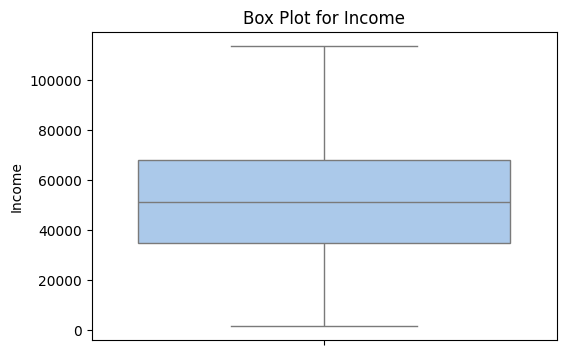

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='Income', palette='pastel')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

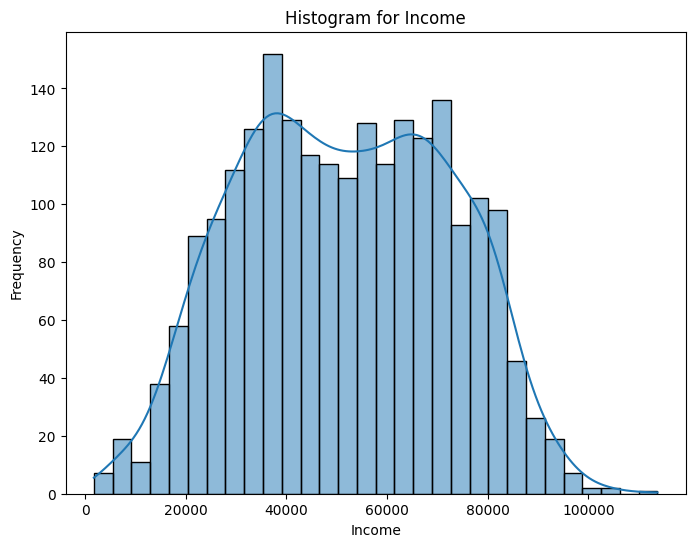

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Income', bins=30, kde=True, palette='virdis')
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

**Histogram for Age**

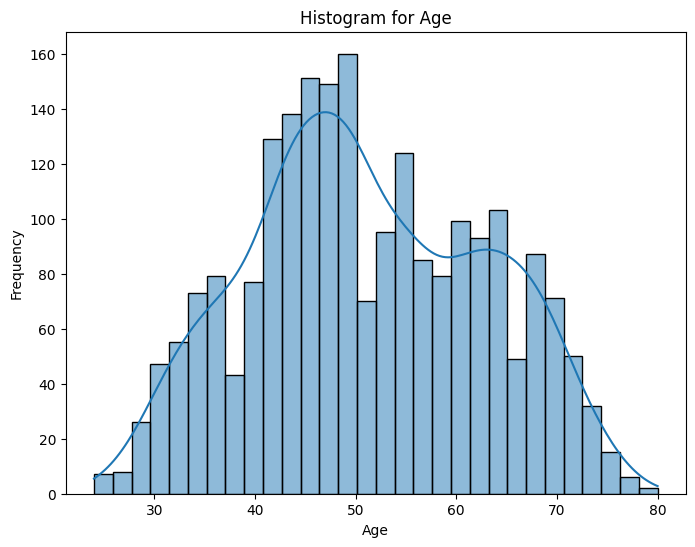

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#**Skewness**
Skewness measures the asymmetry of a data distribution. It tells us whether the data is skewed to the left (negative skew) or the right (positive skew).

Positive skew (Right-skewed): Tail is longer on the right side; mean > median > mode.

Negative skew (Left-skewed): Tail is longer on the left side; mean < median < mode.

Zero skew (Symmetric distribution): Mean = median = mode, like in a normal distribution.
#**Kurtosis**
Kurtosis measures the tailedness of a distribution—how heavy or light the tails are compared to a normal distribution.

Leptokurtic (Kurtosis > 3): Heavy tails, more outliers (e.g., financial returns).

Mesokurtic (Kurtosis ≈ 3): Normal distribution.

Platykurtic (Kurtosis < 3): Light tails, fewer extreme values.

In [21]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


#**Correlation matrix**
There are many columns in the data. The correlation matrix will be very crowded if we use all columns of the data frame. We will group the columns and explore correlation between columns in each group and the column 'MntTotal'. We will focus on the column 'MntTotal' to understand how we can segment the customers who buy the most in overall. We can run similar analysis for every type of product.

In [22]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

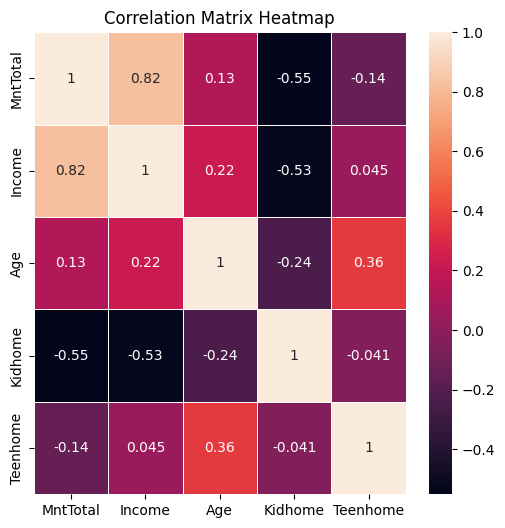

In [23]:
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#**Point-Biserial correlations for binary variables**
Pearson correlation measures the strength and direction of a linear relationship between two continuous variables.

We used Pearson correlation for MntTotal, Age and Income. When we try to understand the relationship between a continuous variable MntTotal and binary variables like marital status then we should use Point-Biserial Correlation Point-Biserial Correlation is used to measure the strength and direction of the linear relationship between a binary variable and a continuous variable.

In [24]:
for col in cols_marital:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

0.0053: Point-Biserial Correlation for marital_Divorced with p-value 0.8041
-0.0188: Point-Biserial Correlation for marital_Married with p-value 0.3767
0.0011: Point-Biserial Correlation for marital_Single with p-value 0.9571
0.0008: Point-Biserial Correlation for marital_Together with p-value 0.9708
0.0370: Point-Biserial Correlation for marital_Widow with p-value 0.0826


There is no strong Point-Biserial correlation between MntTotal and different marital statuses. Some feature engineering may be required during the modelling process.

In [25]:
for col in cols_education:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

-0.0593: Point-Biserial Correlation for education_2n Cycle with p-value 0.0054
-0.1389: Point-Biserial Correlation for education_Basic with p-value 0.0000
0.0159: Point-Biserial Correlation for education_Graduation with p-value 0.4551
0.0004: Point-Biserial Correlation for education_Master with p-value 0.9842
0.0737: Point-Biserial Correlation for education_PhD with p-value 0.0005


**There is no strong relationship between the MntTotal and various education Levels**

#**Feature Engineering**
In this section:

New feature: Marital
New feature: In_relationship
New feature: Marital
The data frame contains 5 columns to reflect marital status. We are going to create a new column 'marital' with values: Divorced, Married, Single, Together, Widow. This column will allow us to draw some additional plots.

In [26]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)

Text(0, 0.5, 'MntTotal')

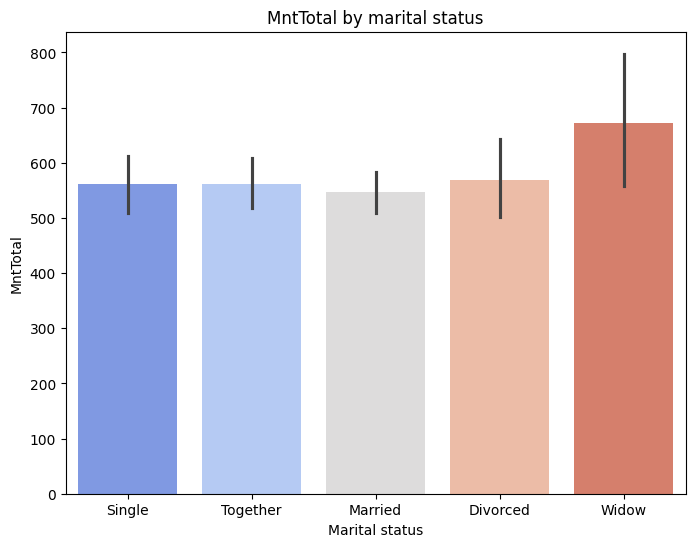

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='coolwarm')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

#**New feature: In_relationship**
There are 3 features that reflect if a person is single (Single, Divorced, Widow) and 2 features if a person is in relationship (Together, Married). We will add an additional feature 'In_relationship'. This feature will equal 1 if a customer's marital status is 'Married' or 'Together' and 0 in all other cases.

In [28]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


#**Machine Learning : K-Means Clustering**
K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similarity. K-means clustering usually works well in practice and scales well to the large datasets.

In this section:

Standardising data
Principal Component Analysis (PCA)
Elbow method
Silhouette score analysis

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


**Principal Component Analysis (PCA)**
PCA is a technique of dimensionality reduction. PCA takes the original features (dimensions) and create new features that capture the most variance of the data.

In [30]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

#**Elbow method**
The elbow method is a technique used to determine the optimal number of clusters (K) for K-means clustering algorithm.

In [32]:
from sklearn.cluster import KMeans

In [33]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

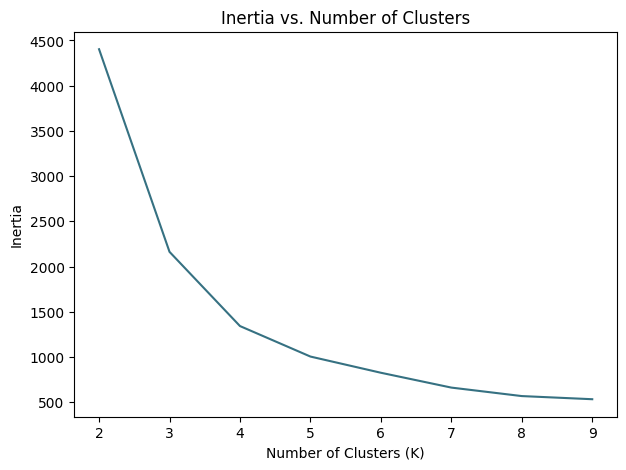

In [34]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

Elbow method suggests 4 or 5 clusters. Let's check silhouette score.

#**Silhouette score analysis**
Silhouette score is a metric that used to assess the quality of clustering. A higher silhouette score indicates that the clusters are well-separated, while a lower score suggests that the clusters may overlap or are poorly defined.

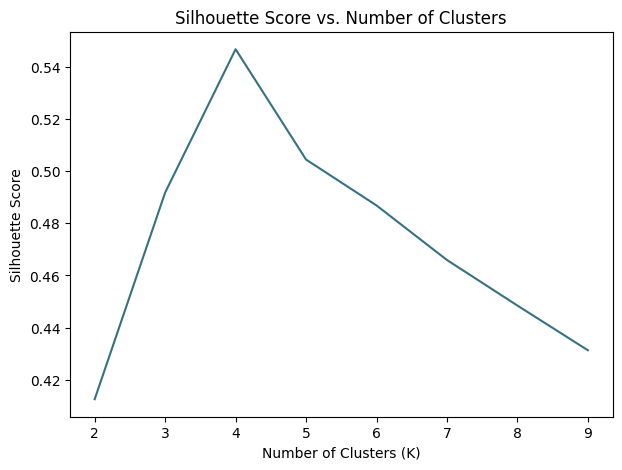

In [35]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

The highest silhouette score is for 4 clusters.

In [36]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

#**Exploration of Clusters**
In this section:

Visualisation of clusters
Mean consumption of different product types by cluster
Cluster sizes
Income by cluster
In_relationship feature by cluster

Visualize the clusters

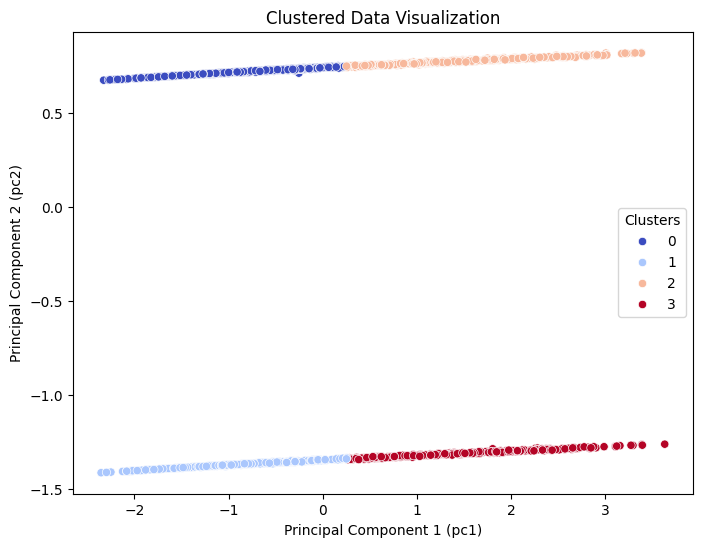

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='coolwarm')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [38]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,38027.656977,160.412791,1.0
1,37332.339956,150.761589,0.0
2,71914.598930,1153.197861,1.0
3,71946.155488,1159.612805,0.0


**Mean consumption of different product types by cluster**

In [39]:
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,160.412791,135.405814,93.372093,7.689535,39.789535,11.547674,8.013953,25.006977
1,1,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
2,2,1153.197861,1082.465241,625.964349,52.814617,343.479501,75.959002,54.980392,70.732620
3,3,1159.612805,1085.332317,613.862805,54.929878,357.902439,77.603659,55.314024,74.280488


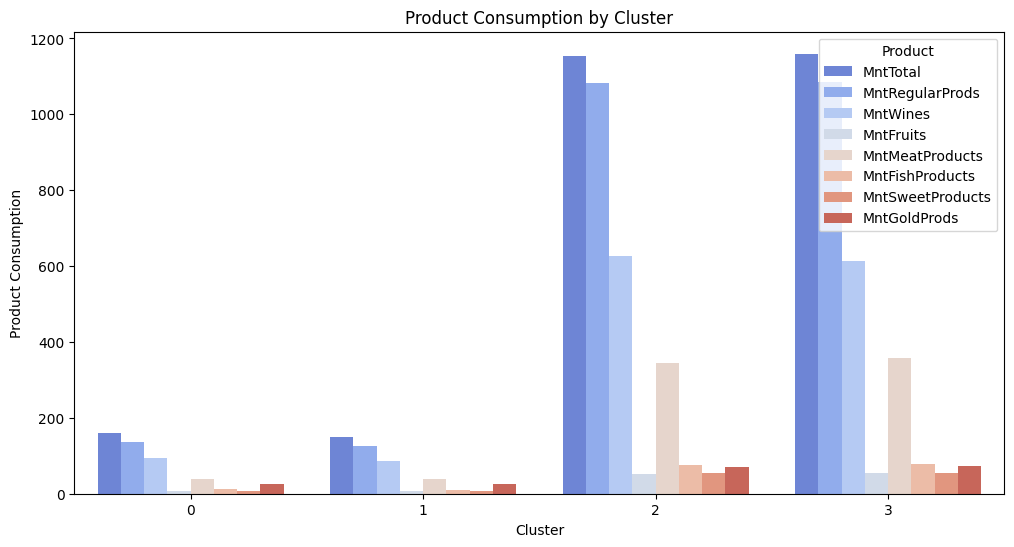

In [40]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="coolwarm")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)
plt.legend(title="Product", loc="upper right")

plt.show()

**Cluster Sizes**

Text(0, 0.5, 'MntTotal')

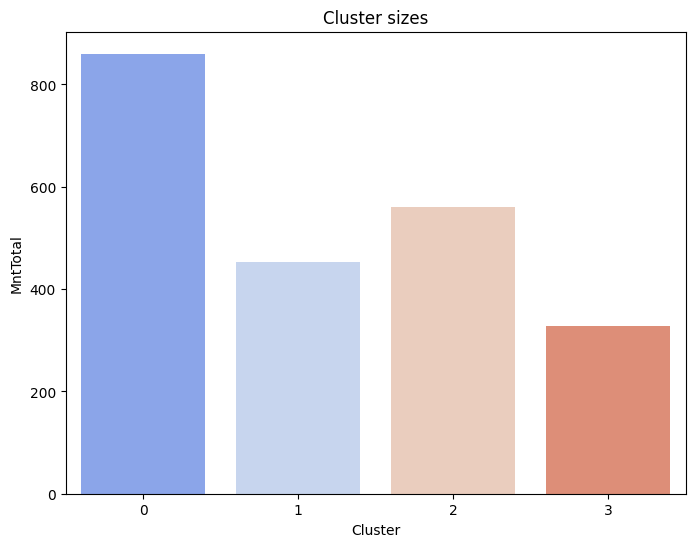

In [41]:
cluster_sizes = data.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'coolwarm')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [42]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,860,39.0
1,1,453,21.0
2,2,561,25.0
3,3,328,15.0


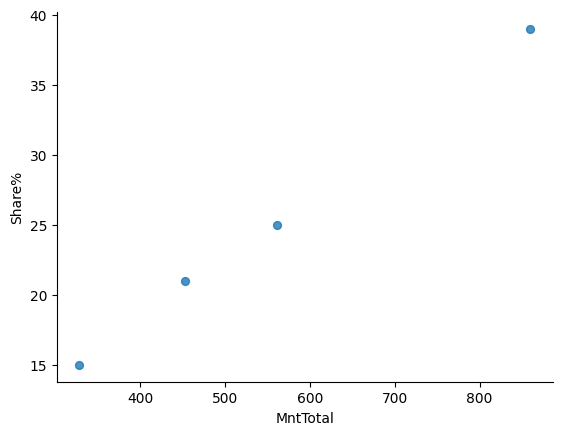

In [43]:
# @title MntTotal vs Share%

from matplotlib import pyplot as plt
cluster_sizes.plot(kind='scatter', x='MntTotal', y='Share%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Income of the Cluster**

**Box Plot**

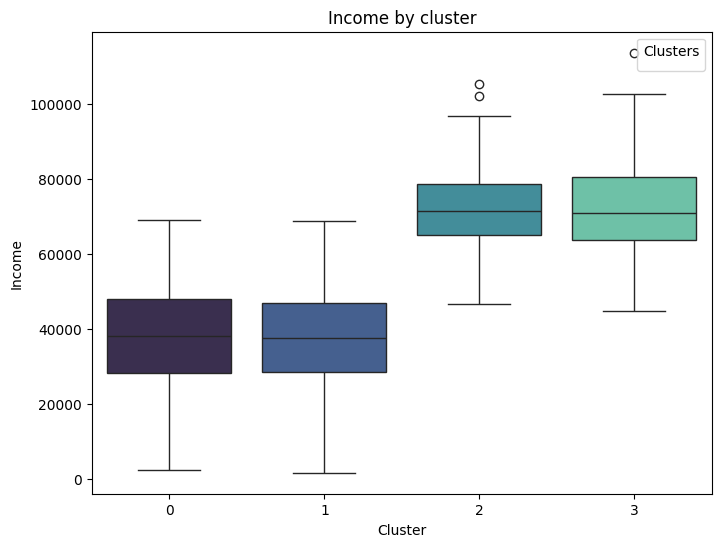

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='mako')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

**Scatter Plot of Income**

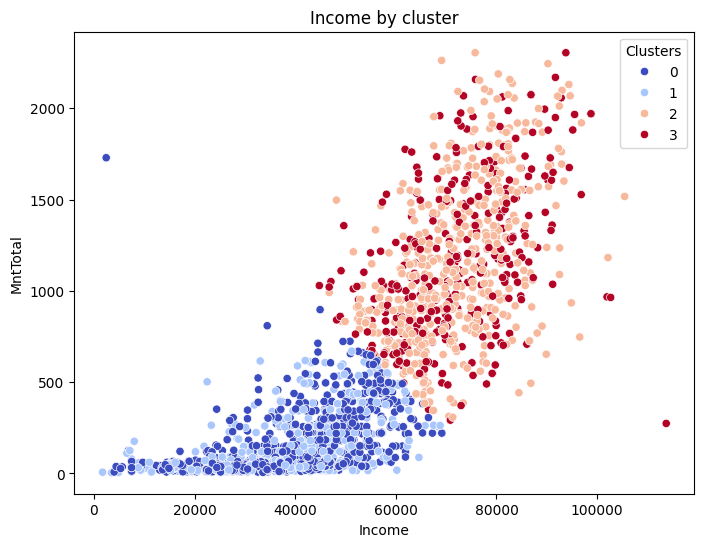

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'Cluster', palette='coolwarm')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

**Create a Machine Learning Model for DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, accuracy_score

In [47]:
# Selecting relevant features for clustering
features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']

In [48]:
# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [49]:
# Finding optimal epsilon using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:, 4], axis=0)

**Plotting the Optimal Epsilon using k-distance graph**

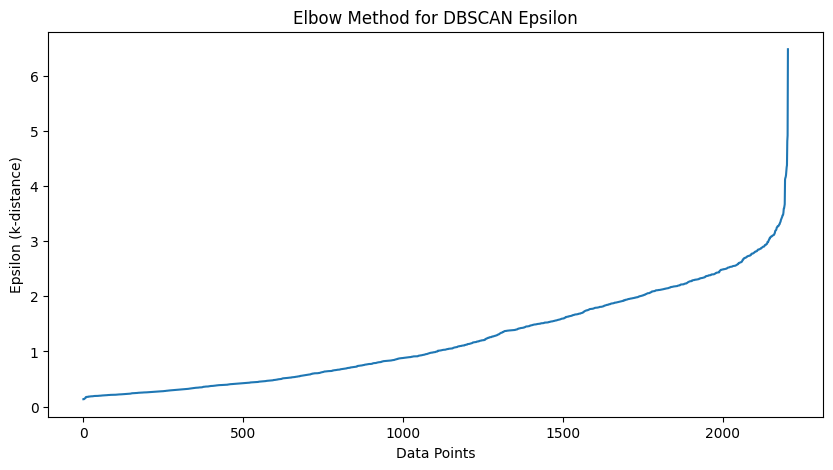

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Epsilon (k-distance)')
plt.title('Elbow Method for DBSCAN Epsilon')
plt.show()

**Apply the DBSCAN for choosing the Parameters**

In [51]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(df_scaled)

#What is the Silhouette Score in Clustering?
The Silhouette Score measures how well-separated and compact clusters are in an unsupervised learning model (like K-Means, DBSCAN, or GMM). It evaluates the cohesion (within-cluster tightness) and separation (between-cluster distance).



In [52]:
# Evaluating clusters using Silhouette Score (ignoring noise points)
if len(set(df['Cluster'])) > 1:
    silhouette_avg = silhouette_score(df_scaled[df['Cluster'] != -1], df[df['Cluster'] != -1]['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print('Silhouette Score cannot be computed - only one cluster found.')

Silhouette Score: 0.1608964522054509


#Types of Errors for model performance

**Mean Squared Error (MSE)**

In [53]:
# Calculating mean squared error for model performance
def calculate_mse(df, features):
    mse_values = []
    for cluster in set(df['Cluster']):
        if cluster != -1:  # Ignore noise points
            cluster_data = df_scaled[df['Cluster'] == cluster]
            cluster_center = cluster_data.mean(axis=0)
            mse = mean_squared_error(cluster_data, np.full(cluster_data.shape, cluster_center))
            mse_values.append(mse)
    return np.mean(mse_values) if mse_values else None

In [54]:
mse_score = calculate_mse(df, features)
print(f'Mean Squared Error (MSE): {mse_score}')

Mean Squared Error (MSE): 0.13560418994534085


#**General MSE Guidelines for Standardized Data**
📌 For data standardized using StandardScaler (mean=0, std=1):

**Low MSE (< 0.5): ✅ Good → Data points are tightly clustered around their centers.**

Moderate MSE (0.5 - 1.2): ⚖️ Acceptable → Clusters are slightly spread but still reasonable.

High MSE (> 1.2): ❌ Potentially poor clustering → Clusters are too dispersed, or there may be many noise points (-1 in DBSCAN).

**Real Mean Squared Errors (RMSE)**

In [55]:
# Calculating Root Mean Squared Error (RMSE) for model performance
def calculate_rmse(df, features):
    rmse_values = []
    for cluster in set(df['Cluster']):
        if cluster != -1:  # Ignore noise points
            cluster_data = df_scaled[df['Cluster'] == cluster]
            cluster_center = cluster_data.mean(axis=0)
            mse = mean_squared_error(cluster_data, np.full(cluster_data.shape, cluster_center))
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
    return np.mean(rmse_values) if rmse_values else None

In [56]:
rmse_score = calculate_rmse(df, features)
print(f'Root Mean Squared Error (RMSE): {rmse_score}')

Root Mean Squared Error (RMSE): 0.3486401109858002


 #**RMSE Range for Standardized Data**

Since you've standardized the features (mean = 0, std = 1):

**Low RMSE (< 0.5) → Indicates well-clustered points, meaning data points are close to their cluster centers.**

#K-Distance Plot for DBSCAN

The Elbow Method for Finding the Optimal k in K-Means Clustering

The Elbow Method helps determine the optimal number of clusters (k) by plotting the within-cluster sum of squares (WCSS) and identifying the "elbow point" where adding more clusters no longer significantly reduces WCSS.

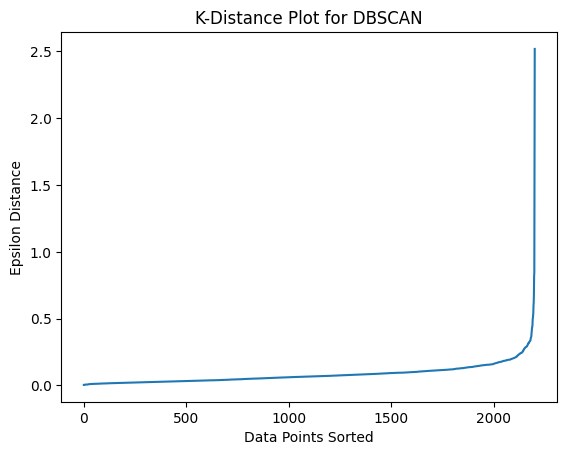

In [57]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Select min_samples (typically 2-4% of data size)
min_samples = 5

# Compute k-nearest neighbor distances
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(X)  # X = your dataset
distances, indices = neighbors.kneighbors(X)

# Sort distances and plot
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel("Data Points Sorted")
plt.ylabel("Epsilon Distance")
plt.title("K-Distance Plot for DBSCAN")
plt.show()


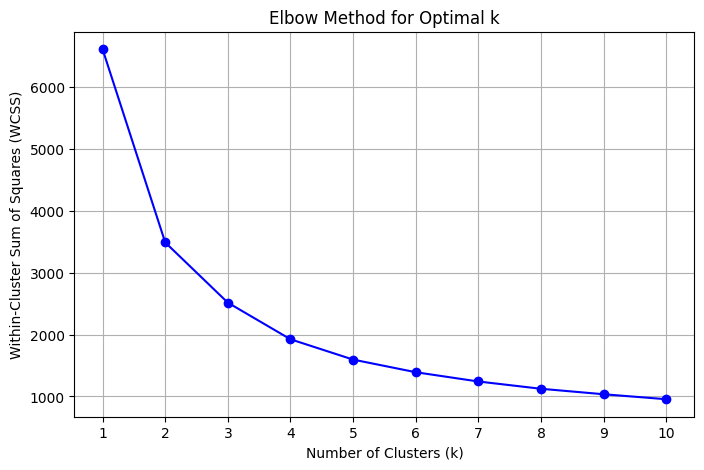

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = df[['MntTotal', 'Income', 'Age']]  # Adjust based on your dataset

# Standardizing the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Compute WCSS for different k values
wcss = []
K_range = range(1, 11)  # Testing k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.grid(True)
plt.show()


**Tune min_samples using the log rule.**

In **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**, the min_samples parameter determines the minimum number of points required to form a dense region. A common heuristic for tuning min_samples is using the log rule

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Try different values of min_samples
for min_samples in range(3, 10):
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette Score for min_samples={min_samples}: {score}")


Silhouette Score for min_samples=3: 0.3817135289512547
Silhouette Score for min_samples=4: 0.3817135289512547
Silhouette Score for min_samples=5: 0.3817135289512547
Silhouette Score for min_samples=6: 0.3817135289512547
Silhouette Score for min_samples=7: 0.3817135289512547
Silhouette Score for min_samples=8: 0.3817135289512547
Silhouette Score for min_samples=9: 0.3817135289512547


**Finding the Best min_samples for DBSCAN Using Silhouette Score**
The Silhouette Score helps evaluate the quality of clustering by measuring how similar a point is to its own cluster compared to other clusters. It ranges from -1 to 1:

**Close to +1 → Well-clustered**

Around 0 → Overlapping clusters

Negative values → Poor clustering


**To check the percentage of noise points?**

In [60]:
import numpy as np

# Count noise points (-1 labels)
labels = dbscan.fit_predict(X)
num_noise = np.sum(labels == -1)
total_points = len(labels)

noise_percentage = (num_noise / total_points) * 100
print(f"Noise Percentage: {noise_percentage:.2f}%")


Noise Percentage: 0.27%


DBSCAN marks some points as noise (-1 labels) if they don’t belong to any dense region.
📌 If more than 30% of points are noise, DBSCAN is too strict!

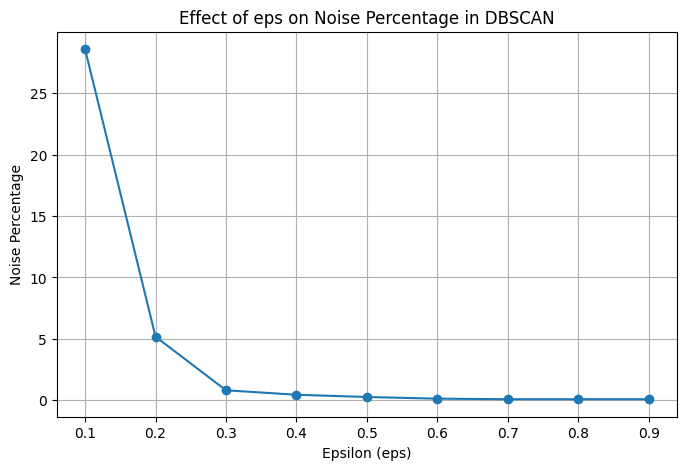

In [62]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

eps_values = np.arange(0.1, 1.0, 0.1)  # Try different eps values
noise_percentages = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=int(np.log(len(X))))  # Use log rule
    labels = dbscan.fit_predict(X)
    num_noise = np.sum(labels == -1)
    noise_percentages.append((num_noise / len(labels)) * 100)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(eps_values, noise_percentages, marker='o', linestyle='-')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Noise Percentage')
plt.title('Effect of eps on Noise Percentage in DBSCAN')
plt.grid(True)
plt.show()


#Compare DBSCAN with K-Means in Python

In [61]:
from sklearn.cluster import KMeans

# K-Means with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Compute Silhouette Score for K-Means
kmeans_score = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score}")


K-Means Silhouette Score: 0.4917937631647986


#What is a Good Silhouette Score for K-Means?
The Silhouette Score measures how well clusters are separated and compact. The range is -1 to 1:

Silhouette Score	Clustering Quality	Interpretation
> 0.70	✅ Excellent	Clusters are well-separated and compact.

0.50 - 0.70	👍 Good	Clusters are well-defined but might have some overlap.

0.30 - 0.50	⚠️ Moderate	Some overlap; clusters might need tuning.

0.10 - 0.30	❌ Weak	Clusters are not well-separated; data may not be suited for K-Means.

< 0.10	🚨 Poor	No meaningful clusters; K-Means may not be the best choice.

**Optimize k using the Silhouette Method**

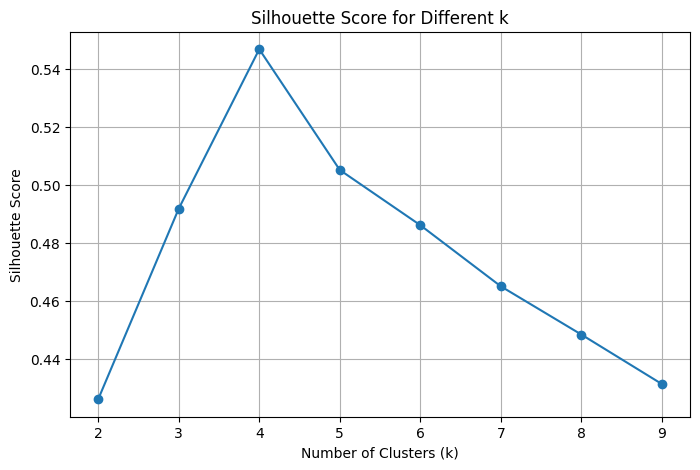

Optimal k based on silhouette score: 4


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K_range = range(2, 10)  # Testing k from 2 to 10
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)
plt.show()

# Print the best k
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal k based on silhouette score: {best_k}")


**Standardize the Data**

K-Means performs poorly on unscaled data. Use StandardScaler or MinMaxScaler:

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Use PCA to Reduce Dimensions**
High-dimensional data can make clustering harder. Try Principal Component Analysis (PCA):

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2D for better clustering
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

new_score = silhouette_score(X_pca, kmeans_labels)
print(f"New Silhouette Score after PCA: {new_score}")


New Silhouette Score after PCA: 0.6169251793629512


**Any Suggessions You are Welcome**

#**Thank You !**